In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [207]:
df = pd.read_csv("C:\\Users\\HO KHOI\Desktop\\FINAL project\\bank_customer_clustering_using_unsupervised_learning\\data\\CC GENERAL.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HO KHOI\AppData\Local\Temp\ipykernel_25260\1727487930.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\\HO KHOI\Desktop\\FINAL project\\bank_customer_clustering_using_unsupervised_learning\\data\\CC GENERAL.csv")


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [211]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [213]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [215]:
df.loc[(df['MINIMUM_PAYMENTS'].isna() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isna() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()

In [217]:
df.drop(['CUST_ID'], axis=1, inplace=True)
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [219]:
len(df.columns)

17

C:\Users\HO KHOI\AppData\Local\Temp\ipykernel_25260\990649714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
C:\Users\HO KHOI\AppData\Local\Temp\ipykernel_25260\990649714.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

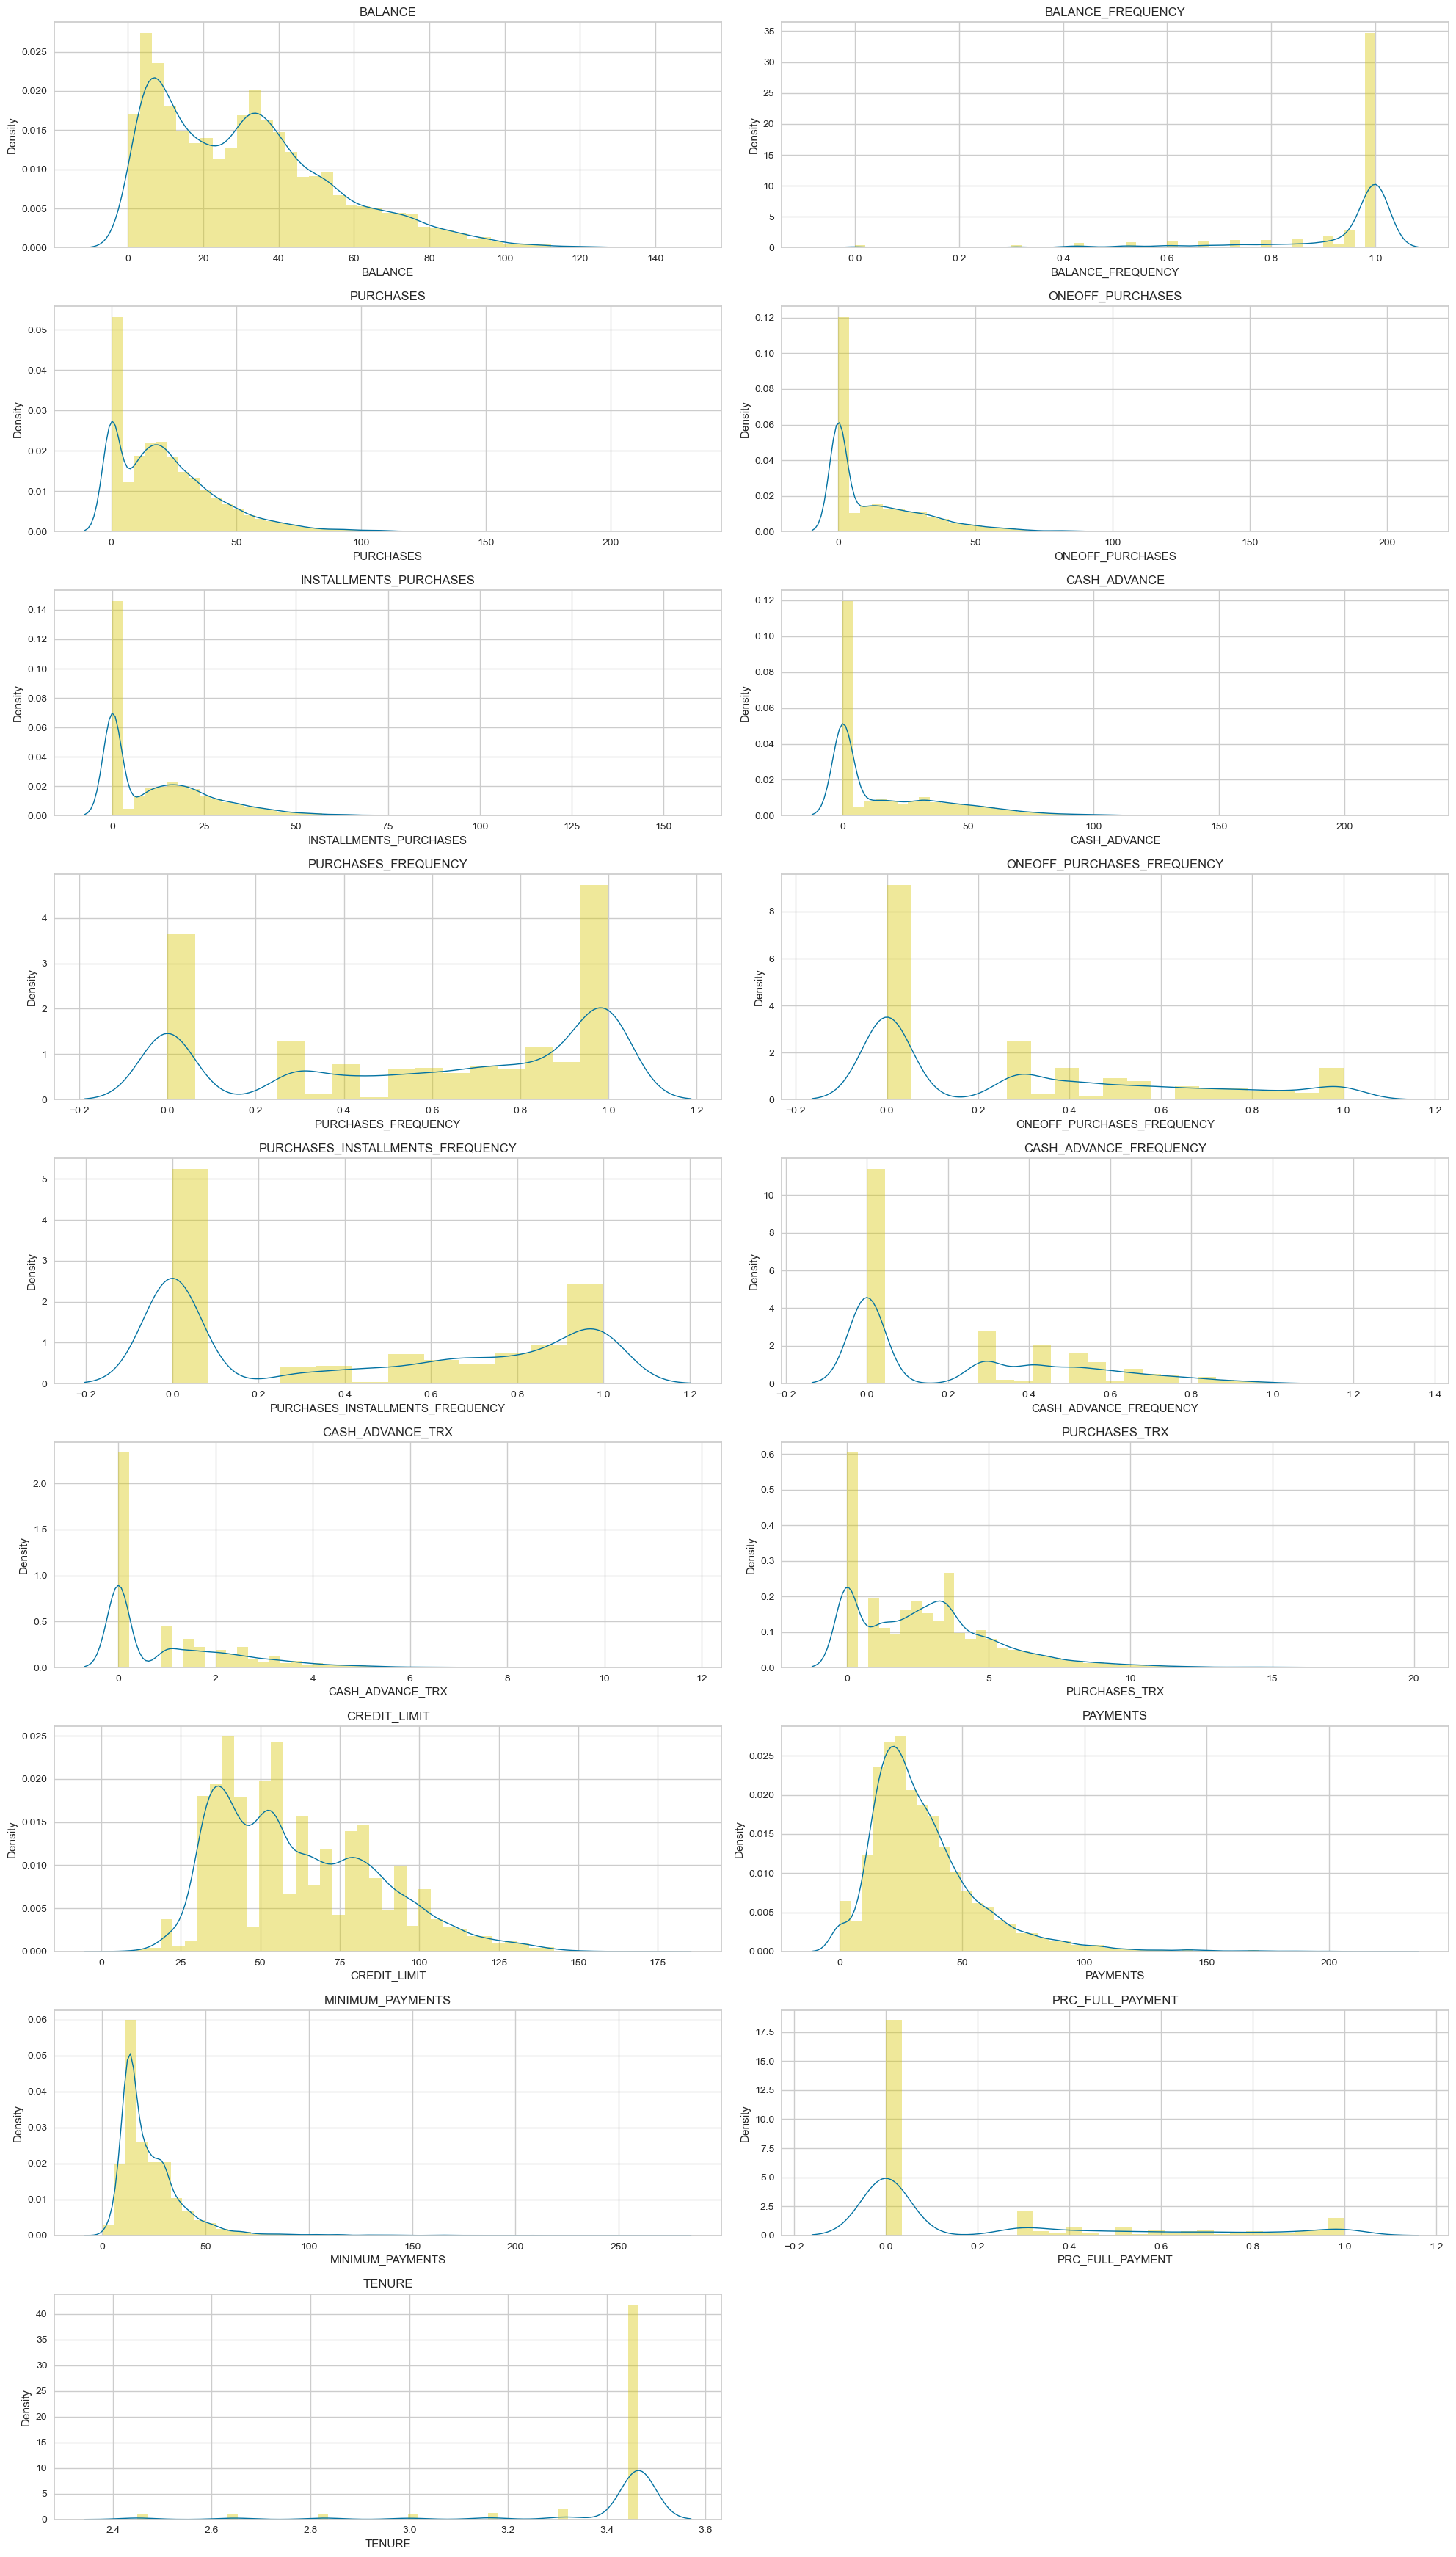

In [221]:
df2 = df.copy()

for col in df.columns:
    df2[col] = np.sqrt(df2[col])
# Plotting a distplot
plt.figure(figsize=(20, 35))
for i in range(len(df2.columns)):
    plt.subplot(9, 2, i+1)
    sns.distplot(df2[df2.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df2.columns[i])

plt.tight_layout()

C:\Users\HO KHOI\AppData\Local\Temp\ipykernel_25260\1596343502.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2.columns[i]], kde_kws={"color": "r", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
C:\Users\HO KHOI\AppData\Local\Temp\ipykernel_25260\1596343502.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

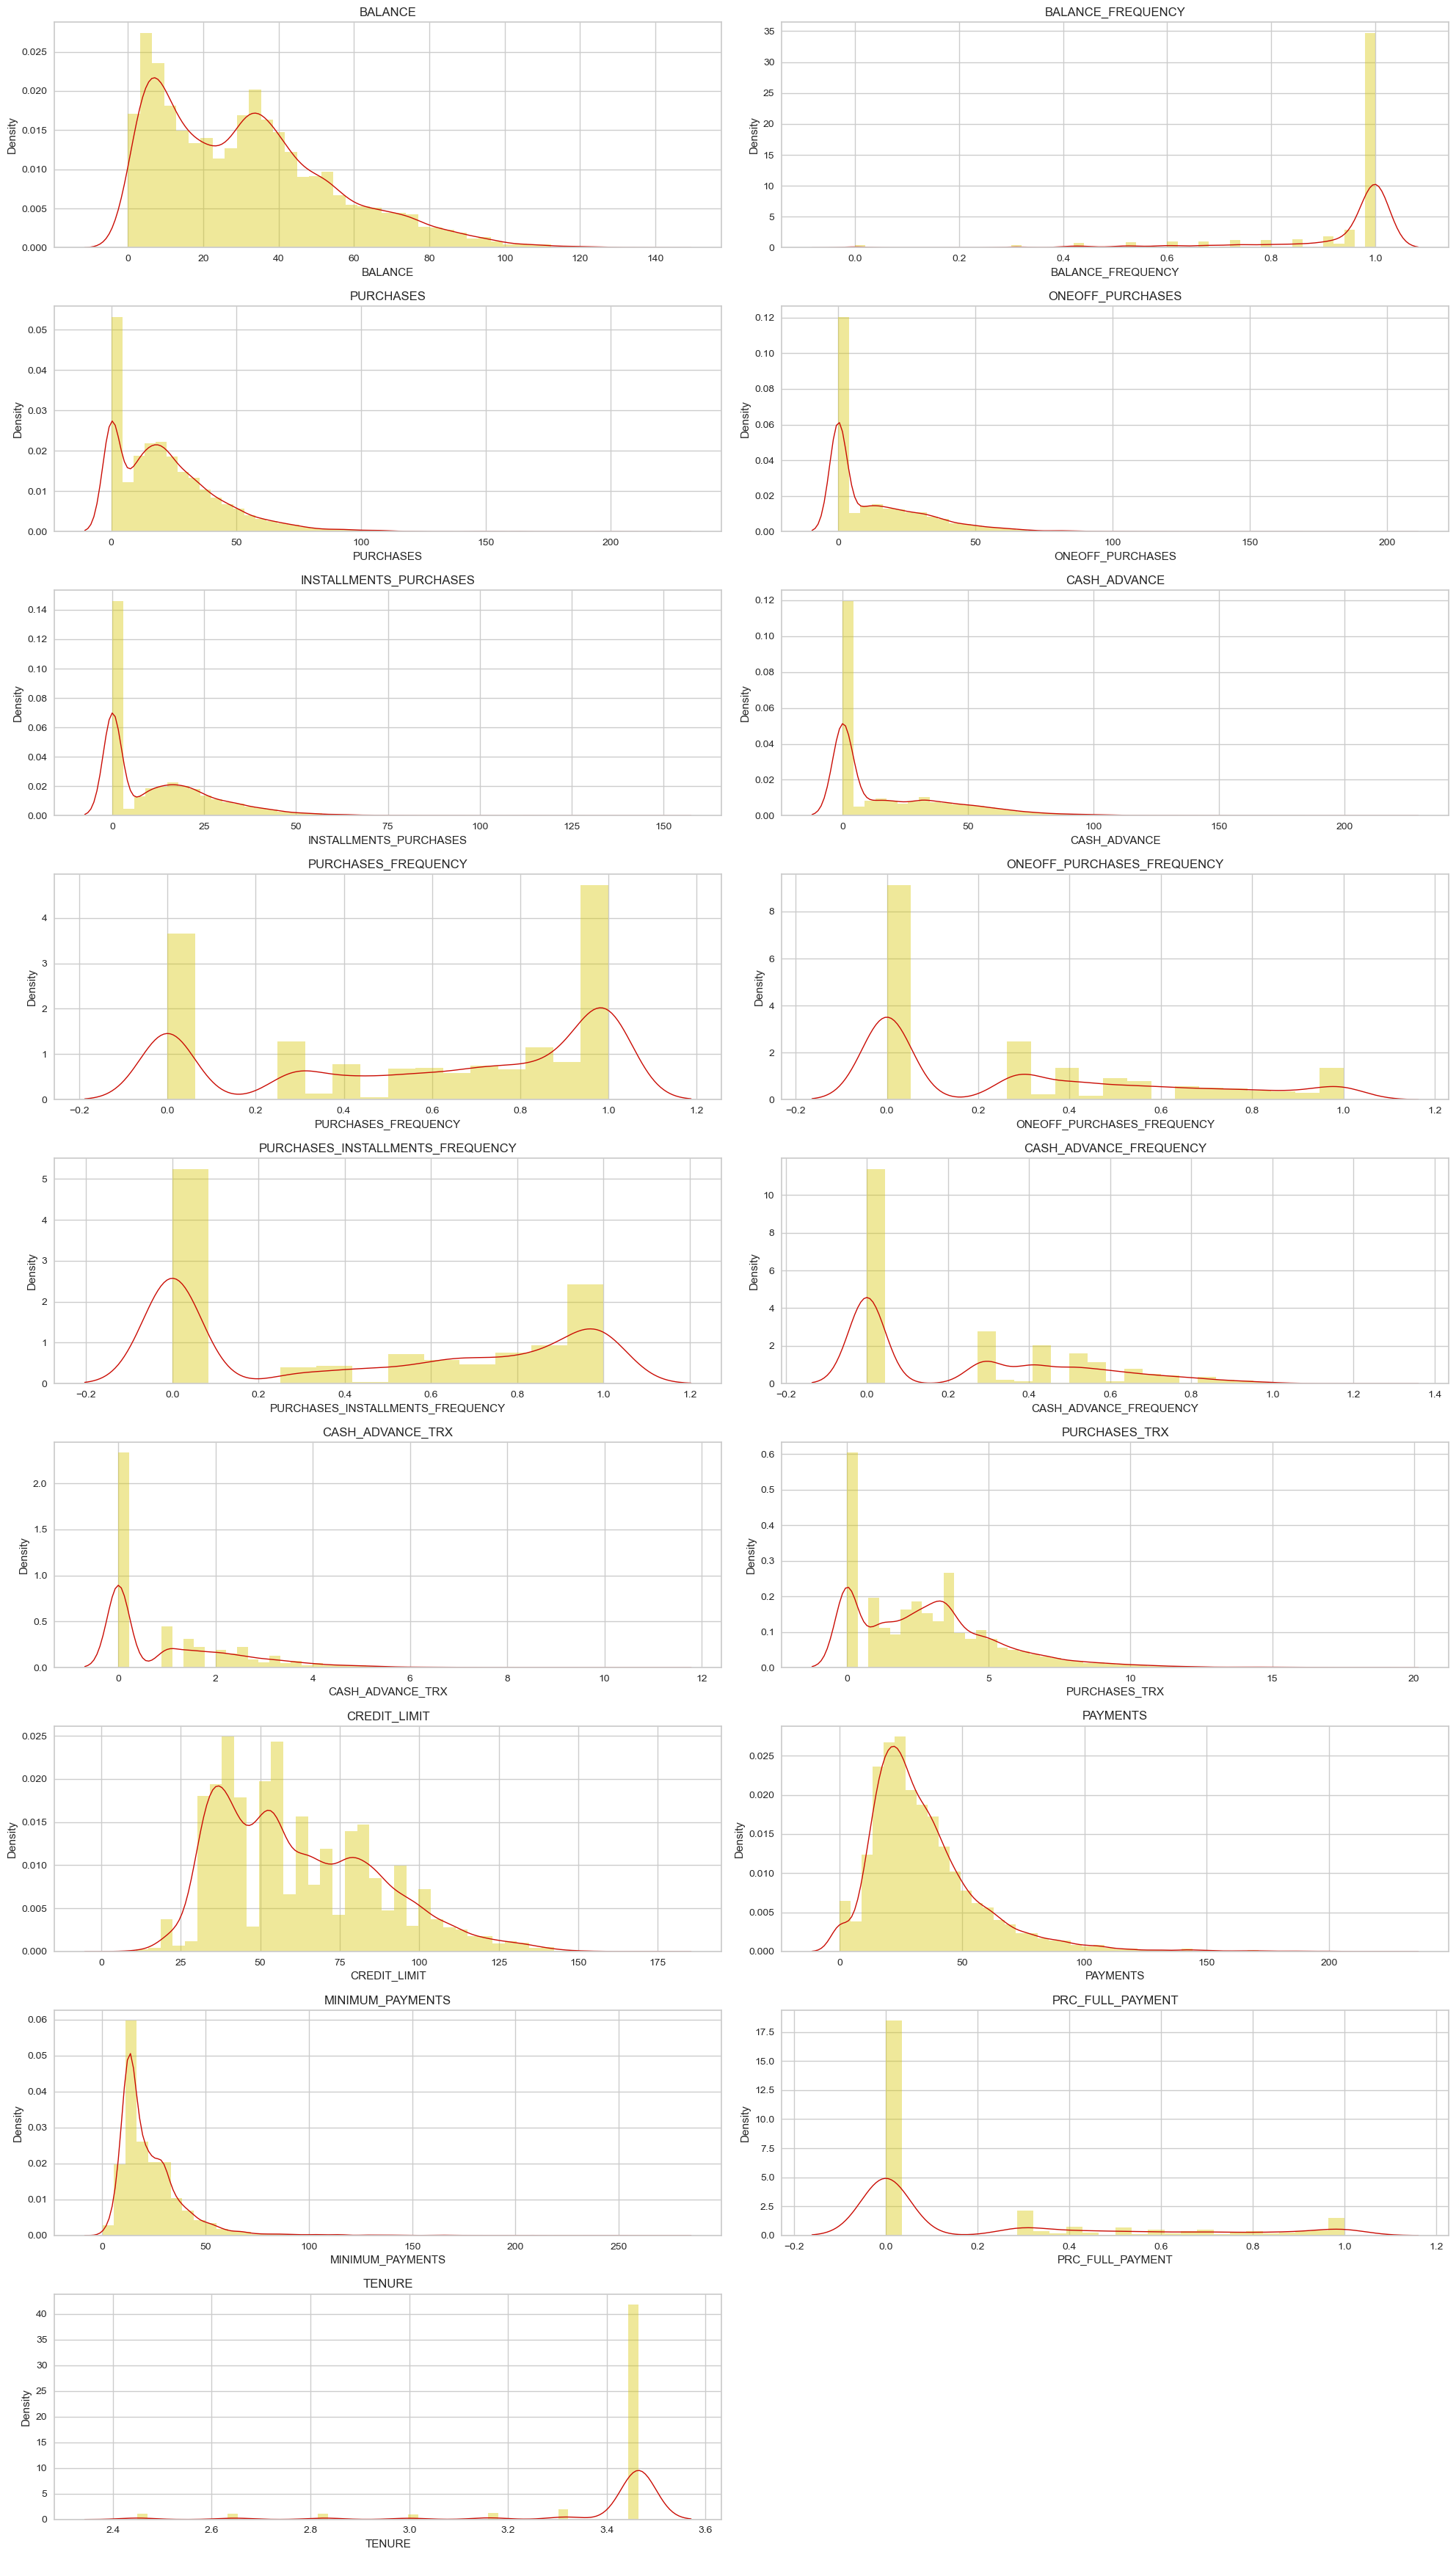

In [222]:
df2 = df.copy()

for col in df.columns:
    df2[col] = np.sqrt(df2[col])
# Plotting a distplot
plt.figure(figsize=(20, 35))
for i in range(len(df2.columns)):
    plt.subplot(9, 2, i+1)
    sns.distplot(df2[df2.columns[i]], kde_kws={"color": "r", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df2.columns[i])

plt.tight_layout()

Finding correlations in dataset

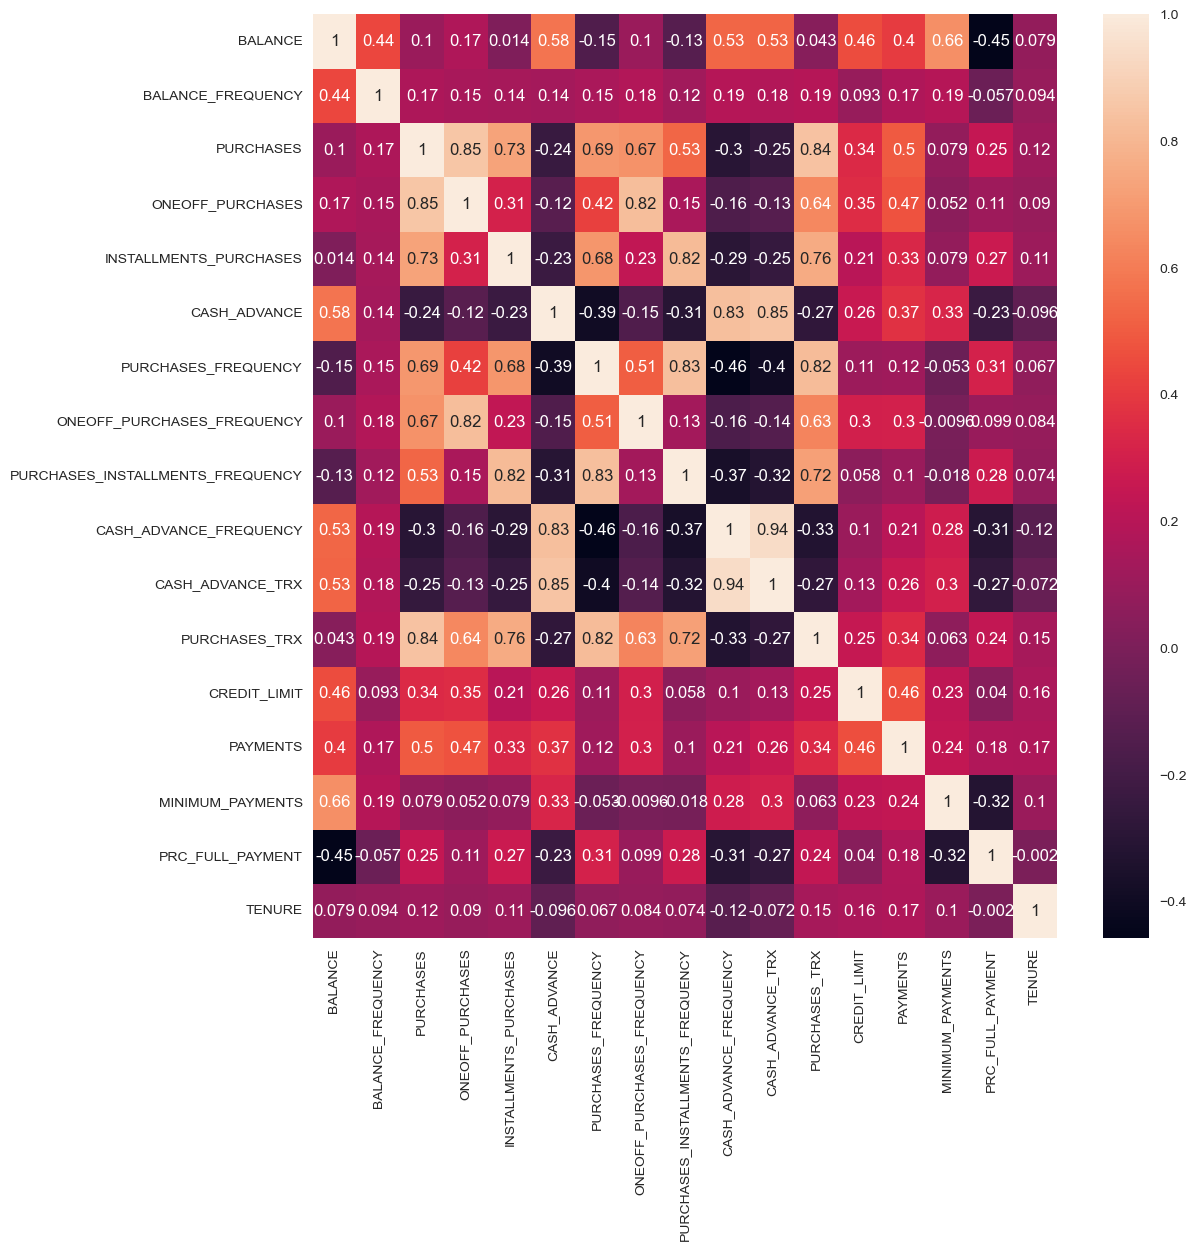

In [224]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()

#### scale data

In [226]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# PCA to reduce dimension

In [228]:
pca = PCA(n_components=2, random_state=12)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = principal_components, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.885217,-2.482969
1,-3.000240,2.015255
2,1.191773,0.385186
3,-0.794760,0.218509
4,-1.265122,-1.593251


# K-means clustering

In [230]:
inertia= []
for k in range(1, 11): 
    kmean= KMeans(n_clusters=k, random_state=42).fit(pca_df)
    inertia.append(kmean.inertia_)

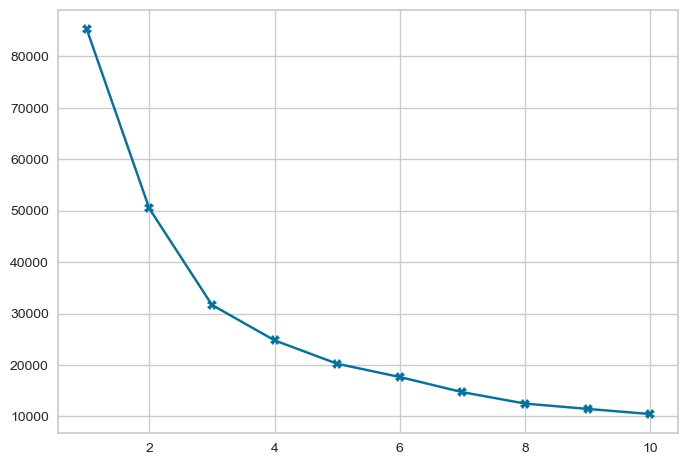

In [231]:
plt.plot(range(1, 11), inertia, marker= 'X')
plt.show()

5 is best

In [233]:
kmean= KMeans(n_clusters=5, random_state=42)
kmean.fit(pca_df)


KMeans(n_clusters=5, random_state=42)

In [234]:
labels= kmean.labels_
centroids= kmean.cluster_centers_

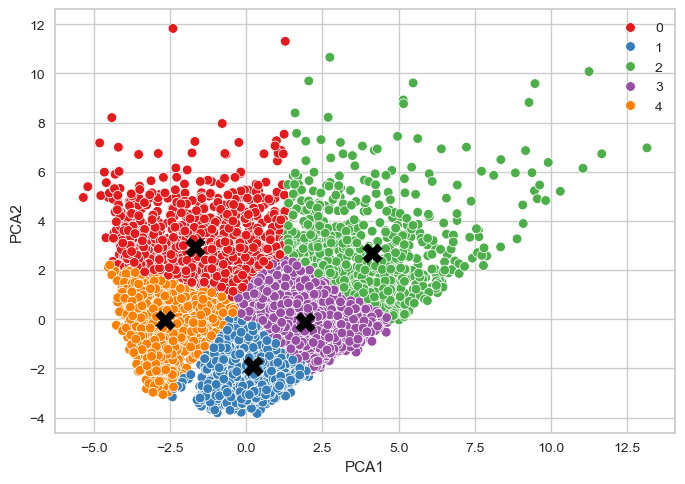

In [235]:
sns.scatterplot(x= pca_df.iloc[:, 0], y= pca_df.iloc[:, 1], hue=labels, palette= 'Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="black", label="Centroids")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [236]:
df['cluster']= labels

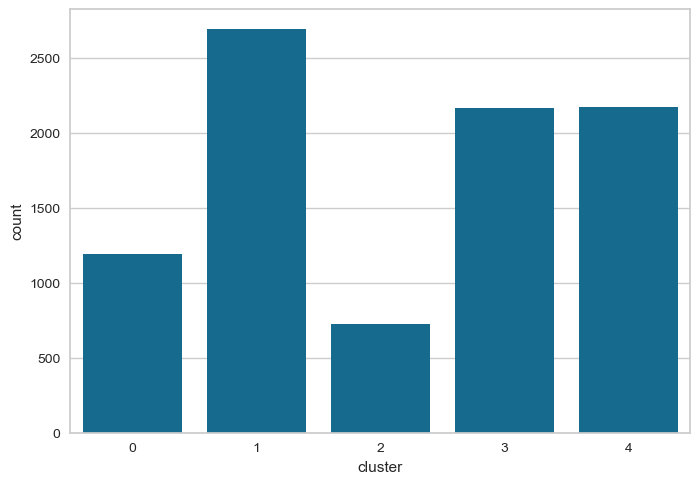

In [237]:
sns.countplot(x="cluster", data=df);

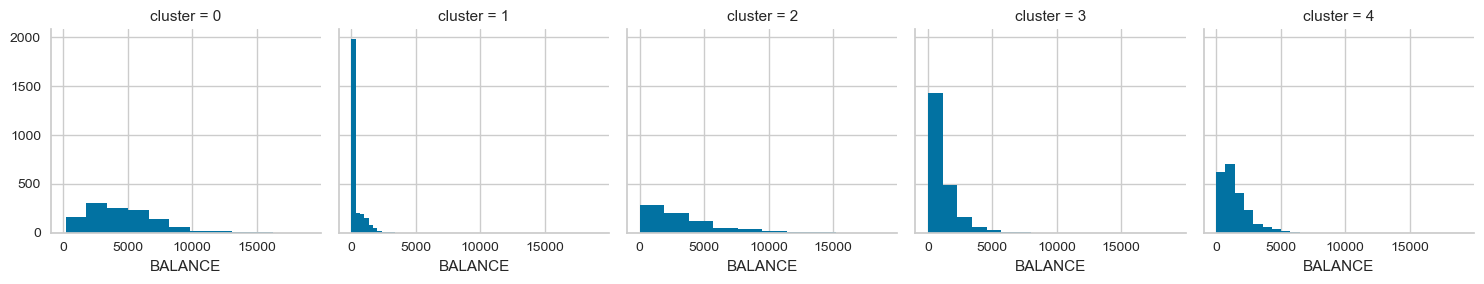

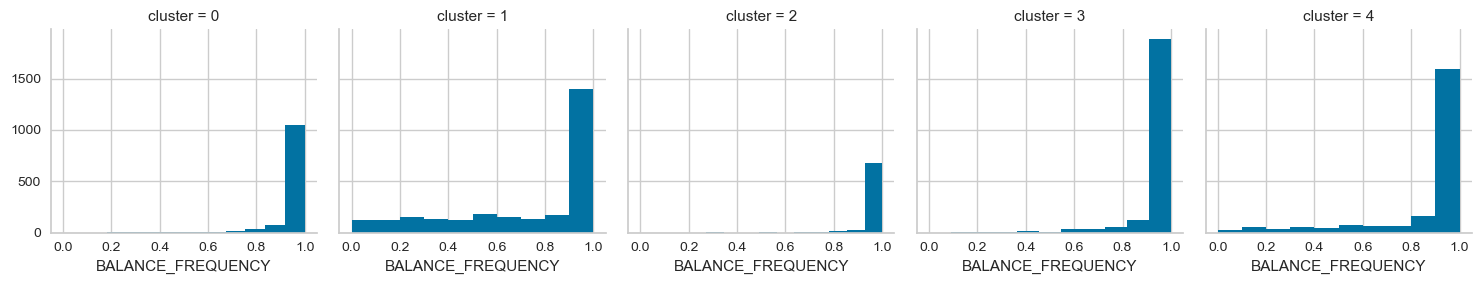

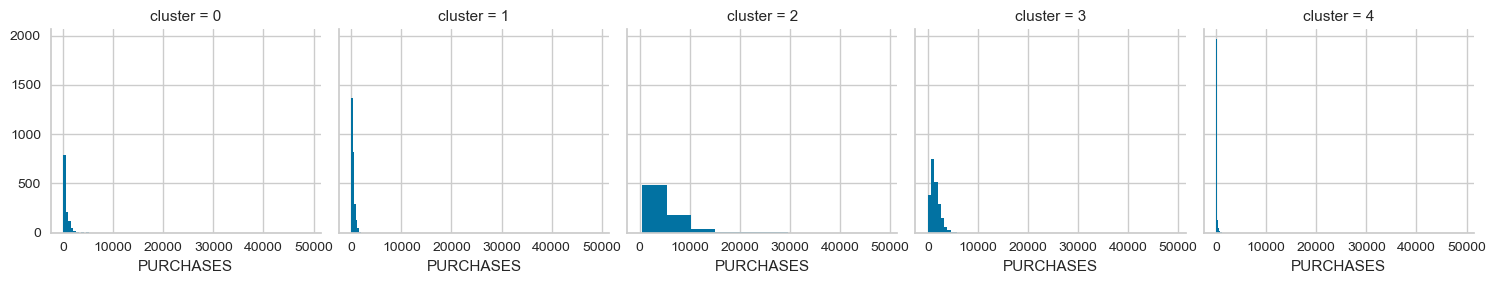

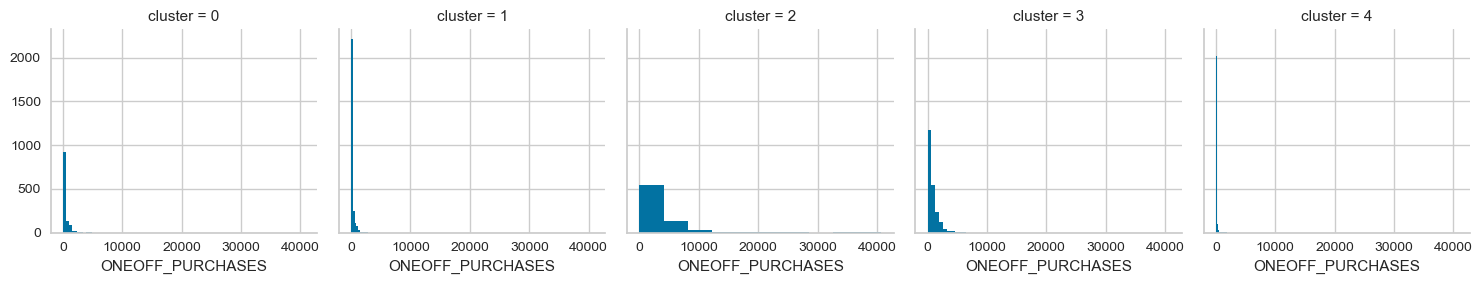

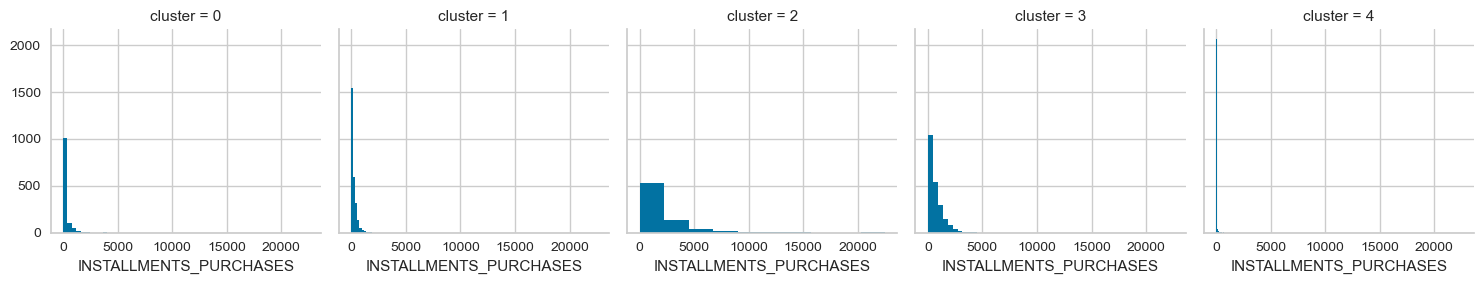

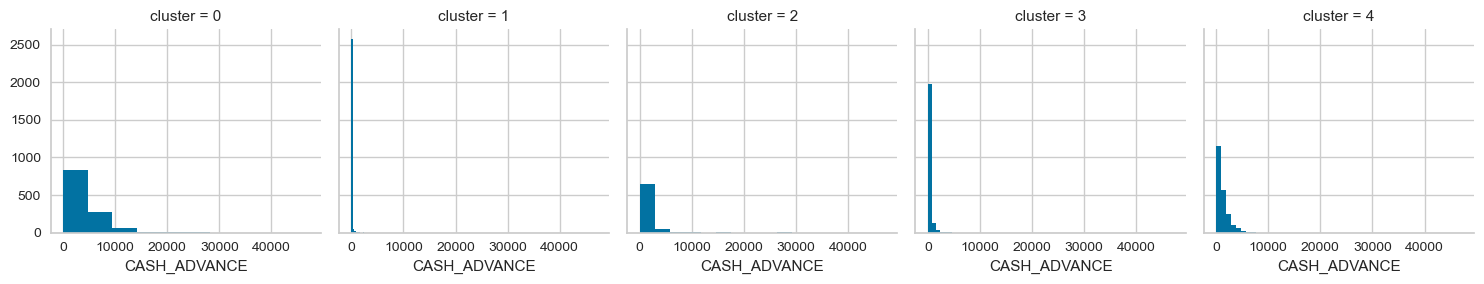

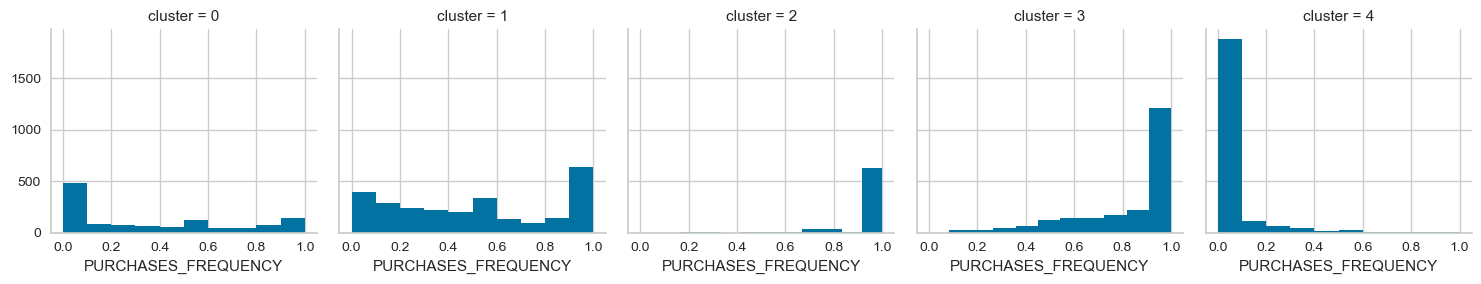

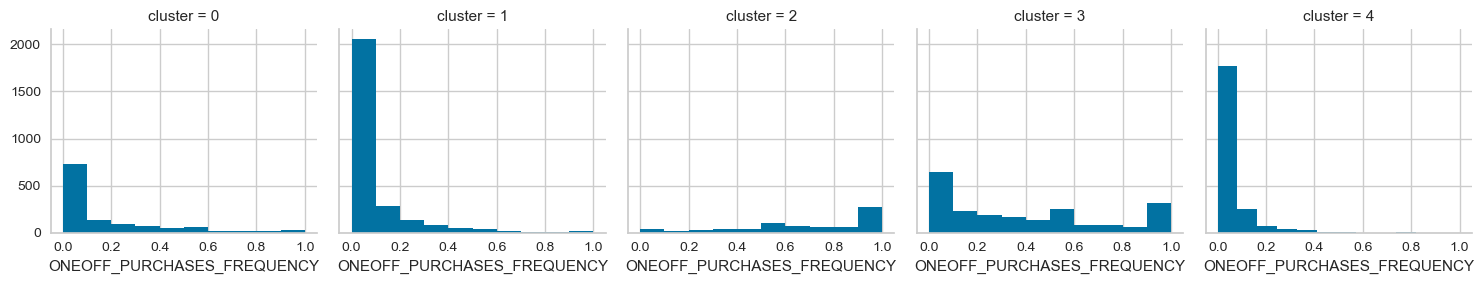

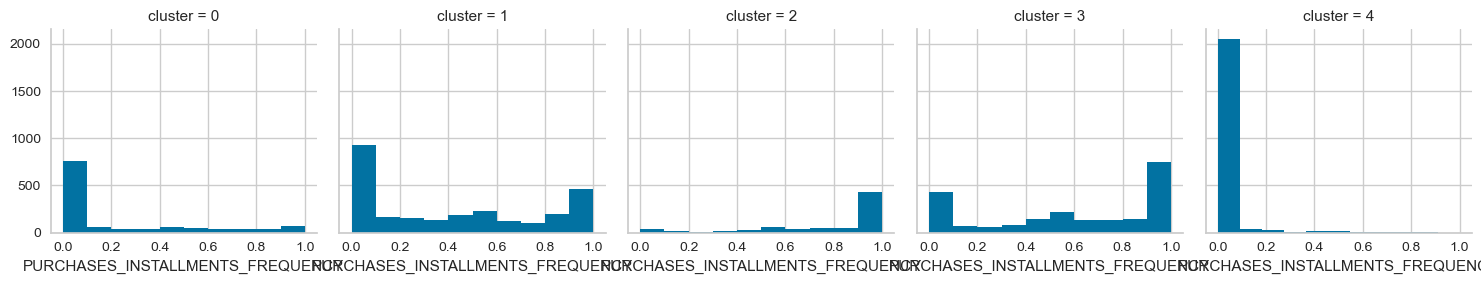

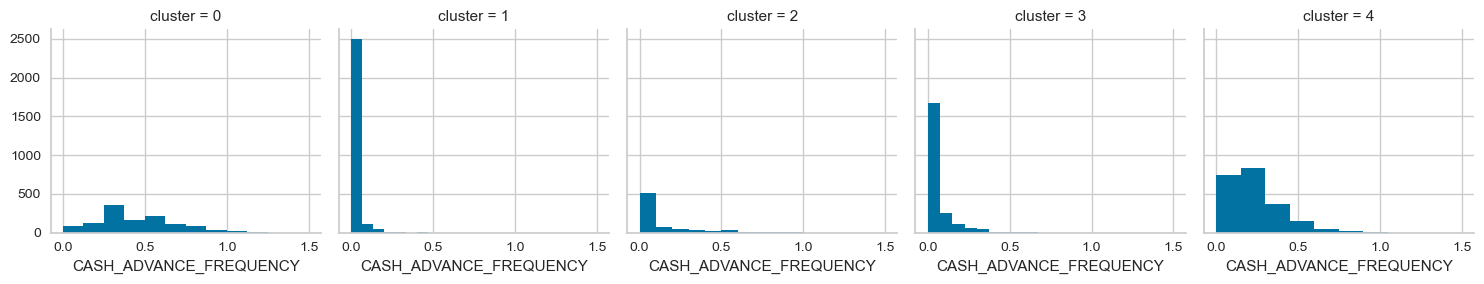

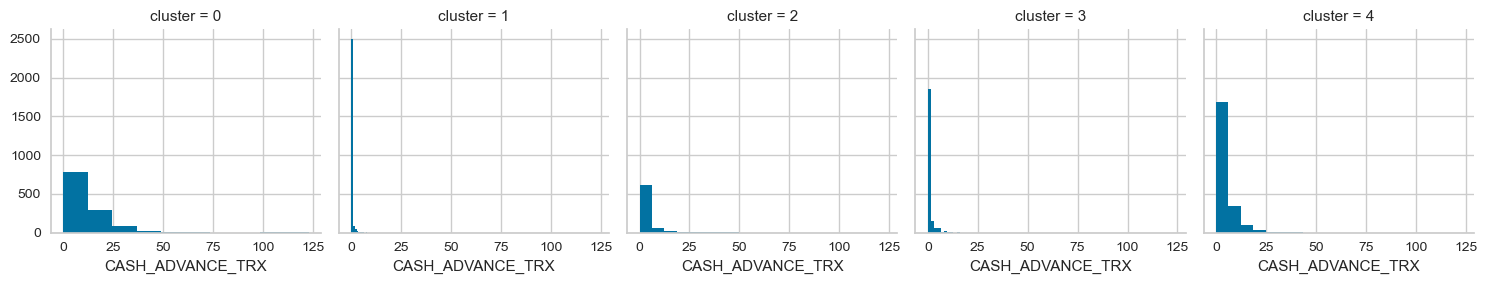

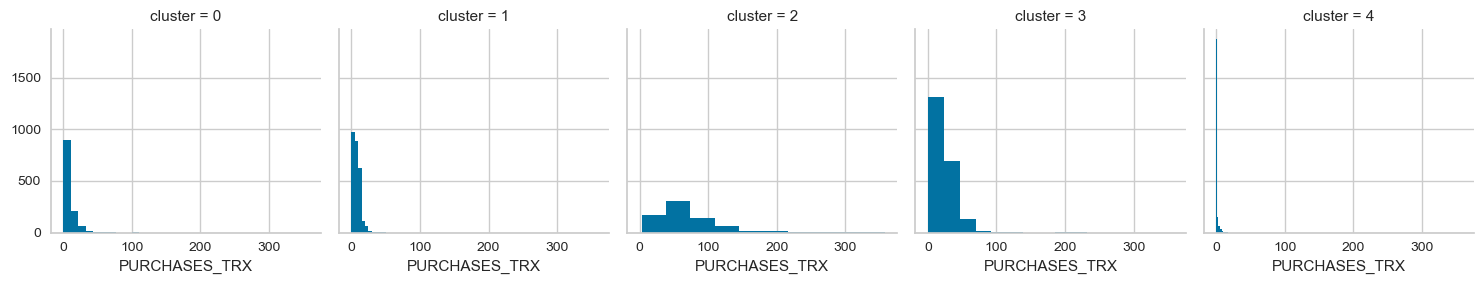

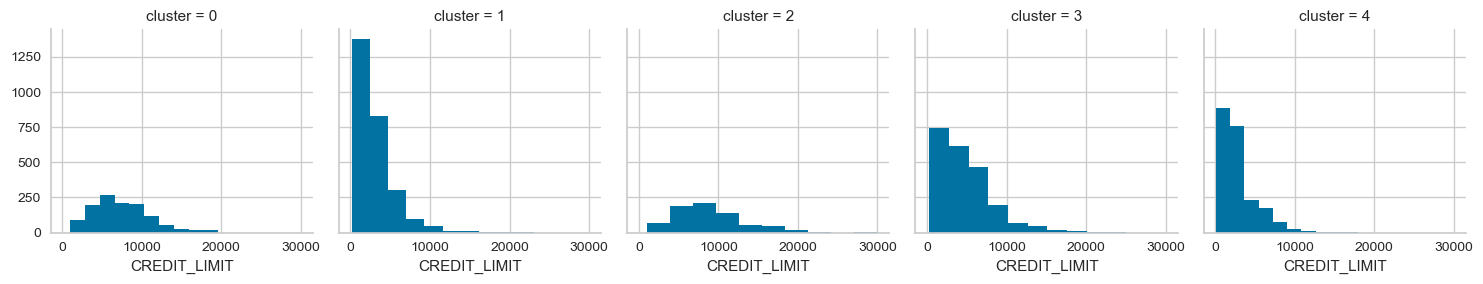

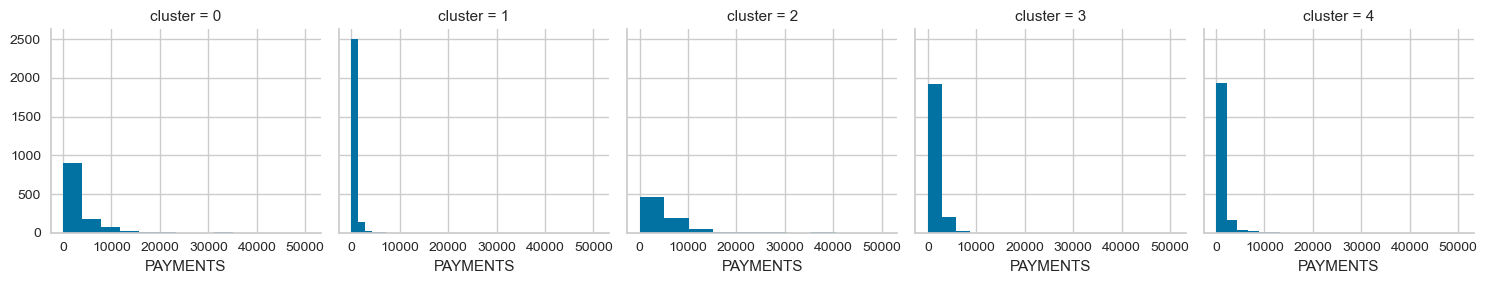

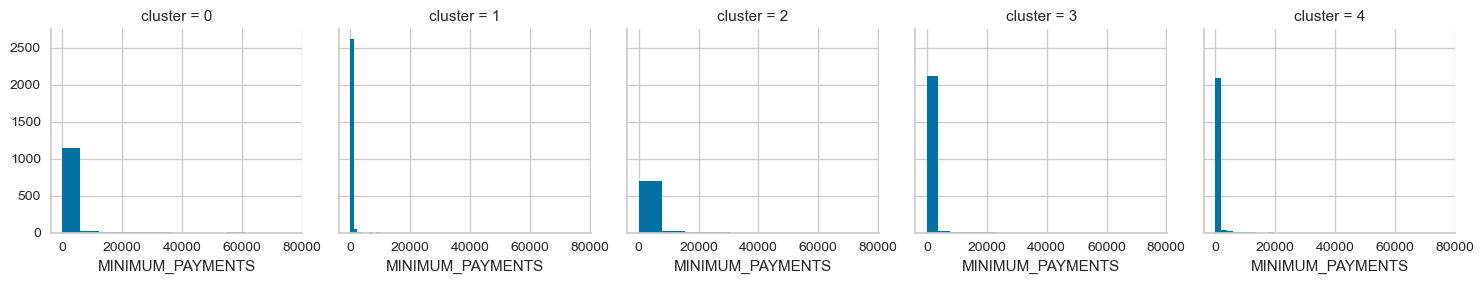

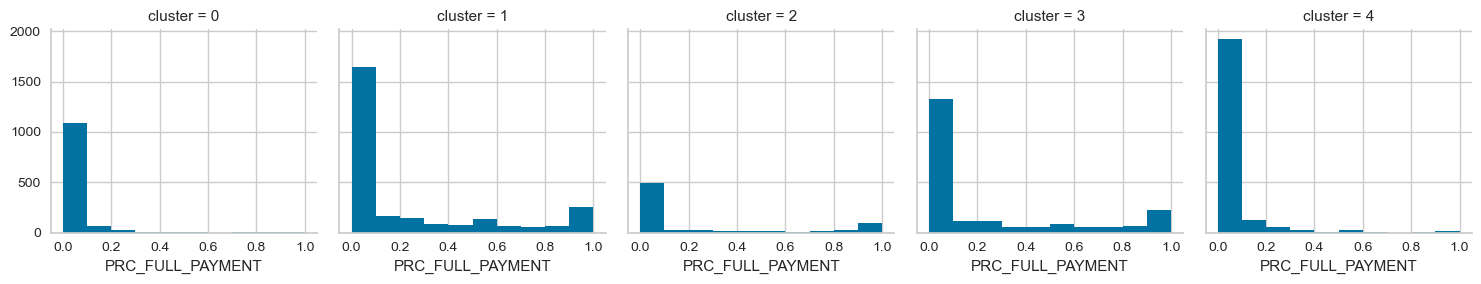

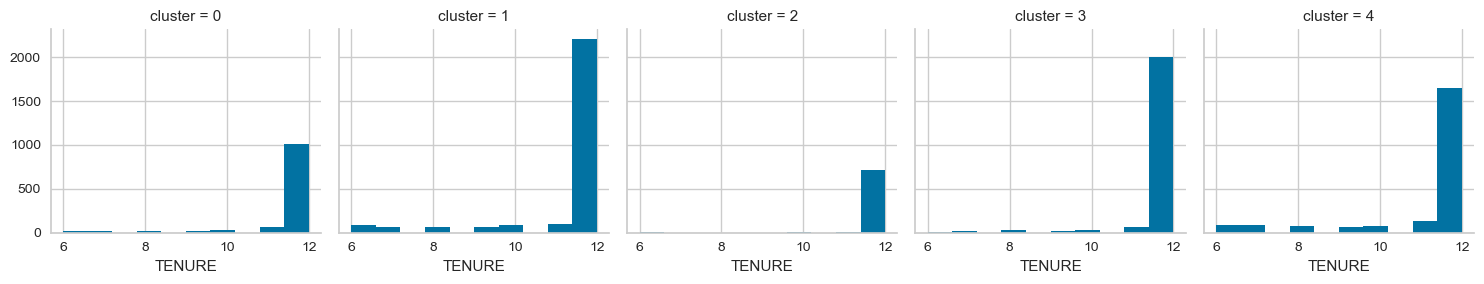

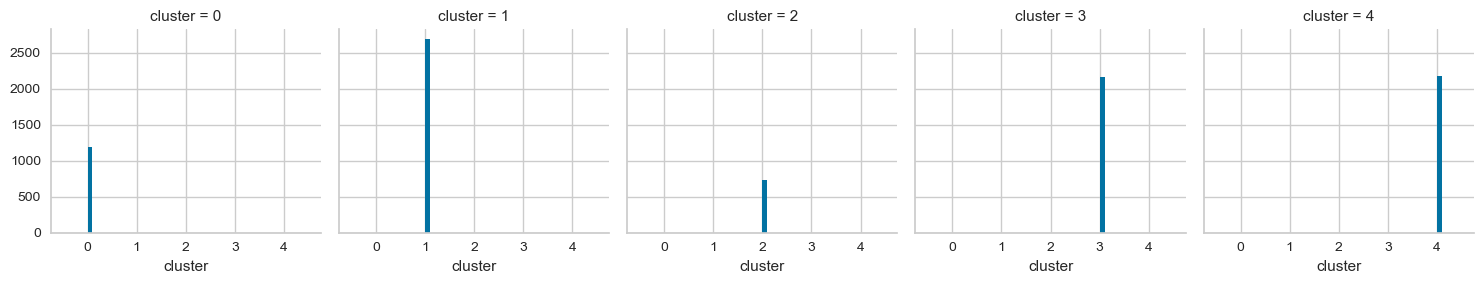

In [238]:
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

#### evaluate K-means

In [240]:
clusters2= pd.concat([df2, pd.DataFrame({'Cluster':labels})], axis=1)
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_df, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_df, labels)}')

Davies-Bouldin index = 0.9367734845782166
Silhouette Score = 0.3742353972743333


C:\Users\HO KHOI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


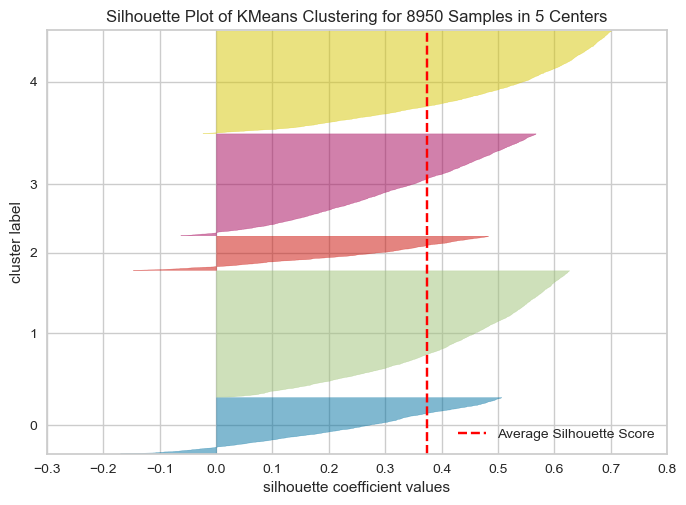

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [258]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis=1)
visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick')
visualizer.fit(pca_df.drop(['Cluster'],axis=1))
visualizer.show()

#### mean of each cluster

In [264]:
analysis_cluster = df.groupby('cluster').apply(lambda x: x.mean()).T
analysis_cluster

C:\Users\HO KHOI\AppData\Local\Temp\ipykernel_25260\4278520455.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  analysis_cluster = df.groupby('cluster').apply(lambda x: x.mean()).T


cluster,0,1,2,3,4
BALANCE,4582.126825,315.601053,3321.100905,1017.634597,1408.923697
BALANCE_FREQUENCY,0.975252,0.739767,0.987822,0.956233,0.877794
PURCHASES,510.240503,365.402147,5653.526479,1461.769543,50.361904
ONEOFF_PURCHASES,333.364020,151.640982,3695.194677,795.773756,39.474982
INSTALLMENTS_PURCHASES,176.961633,214.427515,1959.157111,666.075994,10.896122
CASH_ADVANCE,4136.106954,32.160185,1004.626664,165.391812,1217.649741
PURCHASES_FREQUENCY,0.345955,0.514377,0.950497,0.826470,0.051035
ONEOFF_PURCHASES_FREQUENCY,0.161001,0.084485,0.691024,0.383774,0.026979
PURCHASES_INSTALLMENTS_FREQUENCY,0.204614,0.410253,0.796775,0.593910,0.022257
CASH_ADVANCE_FREQUENCY,0.427342,0.009852,0.115470,0.038593,0.232399


#### number sample in each cluster

In [272]:
df['cluster'].value_counts()

cluster
1    2688
4    2174
3    2167
0    1194
2     727
Name: count, dtype: int64

Cluster 0: Smallest Spenders and Lowest Credit Limit - this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers.

Cluster 1: Medium Spenders with third highest Payments - the second highest Purchases group (after the Big Spenders).

Cluster 2: Big Spenders with large Payments - they make expensive purchases and have a credit limit that is between average and high. This is only a small group of customers.

Cluster 3: Cash Advances with Small Payments - this group likes taking cash advances, but make only small payments.

Cluster 4: Small Spenders and Low Credit Limit - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups

Cluster 5: Cash Advances with large Payments but Highest Credit Limit and Frugal - this group takes the most cash advances. They make large payments, but this appears to be a small group of customers. this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers.

# DBSCAN

In [279]:
db= DBSCAN(eps=1.6, min_samples=4) 

In [283]:
db.fit(pca_df)

DBSCAN(eps=1.6, min_samples=4)

In [285]:
labels= db.labels_

In [289]:
df['DBSCAN cluster']= labels

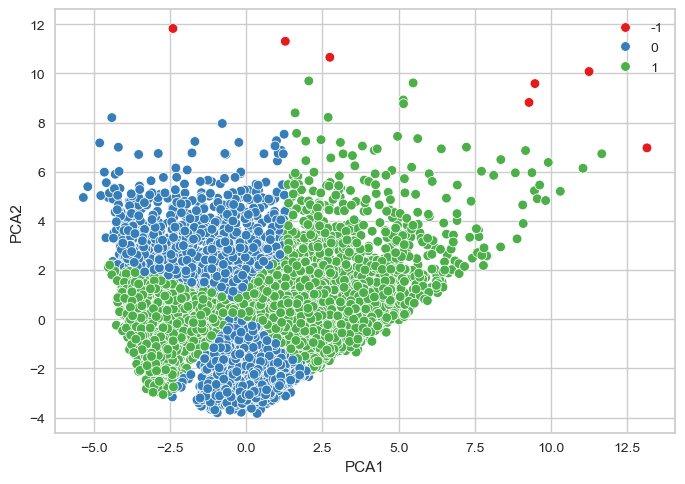

In [293]:
sns.scatterplot(x= pca_df.iloc[:, 0], y= pca_df.iloc[:, 1], hue=labels, palette= 'Set1')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [315]:
#k-mean cluster and DBSCAN cluster
df[['cluster', 'DBSCAN cluster']]

,cluster,DBSCAN cluster
0,1,0
1,0,0
2,3,1
3,4,1
4,1,0
...,...,...
8945,1,0
8946,1,0
8947,1,0
8948,4,1
